In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv("/Users/ryankeen/Personal_Projects/NBA_Betting/data/cleaned/cleaned_data.csv")

In [12]:
pd.set_option('display.max_rows', None)

In [15]:
df.head()

,game_id_player_id,game_id,game_date,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,...,usg_rate,off_rtg,def_rtg,bpm,season,minutes,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute
0,202012230ORLachiupr01,202012230ORL,2020-12-23,A,MIA,107,104.9,0.548,0.194,0.189,...,0.179,142,112,-1.6,2021,13.650000,0.860806,0.849817,0.860806,0.146520
1,202012250MIAachiupr01,202012250MIA,2020-12-25,H,MIA,111,96.8,0.613,0.166,0.118,...,0.214,128,105,-1.8,2021,19.466667,0.988870,1.006849,1.014555,0.308219
2,202012290MIAachiupr01,202012290MIA,2020-12-29,H,MIA,97,103.4,0.538,0.195,0.079,...,0.274,78,136,-11.5,2021,17.633333,0.907372,0.896030,0.907372,0.170132
3,202012300MIAachiupr01,202012300MIA,2020-12-30,H,MIA,119,103.3,0.579,0.188,0.244,...,0.171,41,105,-19.9,2021,12.016667,0.561720,0.499307,0.520111,0.166436
4,202101010DALachiupr01,202101010DAL,2021-01-01,A,MIA,83,97.5,0.417,0.136,0.100,...,0.297,136,98,14.8,2021,11.983333,1.543811,1.477051,1.502086,0.000000


In [16]:
df.columns

Index(['game_id_player_id', 'game_id', 'game_date', 'H_A', 'Team_Abbrev',
       'Team_Score', 'Team_pace', 'Team_efg_rate', 'Team_tov_rate',
       'Team_orb_rate', 'Team_ft_rate', 'Team_off_rtg', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_rate',
       'Opponent_tov_rate', 'Opponent_orb_rate', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player_id', 'starter', 'fg', 'fga', 'fg_rate',
       'fg3', 'fg3a', 'fg3_rate', 'ft', 'fta', 'ft_rate', 'pts', 'plus_minus',
       'did_not_play', 'ts_rate', 'efg_rate', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_rate', 'drb_rate', 'trb_rate', 'ast_rate',
       'stl_rate', 'blk_rate', 'tov_rate', 'usg_rate', 'off_rtg', 'def_rtg',
       'bpm', 'season', 'minutes', 'DKP_per_minute', 'FDP_per_minute',
       'SDP_per_minute', 'pf_per_minute'],
      dtype='object')

In [37]:
#Find which columns have null values
nulls = []
for column in df.columns: 
    if df[column].isnull().any() == True:
        nulls.append(column)
nulls

['DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute', 'pf_per_minute']

In [60]:
df[(df['pf_per_minute'].isnull() == True) & (df['minutes'] != 0)]

#values are null if a player did not play
#will leave null values for minute prediction, but will remove for point prediction

,game_id_player_id,game_id,game_date,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,...,usg_rate,off_rtg,def_rtg,bpm,season,minutes,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute


In [66]:
len(df.Team_Abbrev.unique())

30

In [91]:
game_dates = df.game_date.unique()
sorted(game_dates, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))

['2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30',
 '2019-10-31',
 '2019-11-01',
 '2019-11-02',
 '2019-11-03',
 '2019-11-04',
 '2019-11-05',
 '2019-11-06',
 '2019-11-07',
 '2019-11-08',
 '2019-11-09',
 '2019-11-10',
 '2019-11-11',
 '2019-11-12',
 '2019-11-13',
 '2019-11-14',
 '2019-11-15',
 '2019-11-16',
 '2019-11-17',
 '2019-11-18',
 '2019-11-19',
 '2019-11-20',
 '2019-11-21',
 '2019-11-22',
 '2019-11-23',
 '2019-11-24',
 '2019-11-25',
 '2019-11-26',
 '2019-11-27',
 '2019-11-29',
 '2019-11-30',
 '2019-12-01',
 '2019-12-02',
 '2019-12-03',
 '2019-12-04',
 '2019-12-05',
 '2019-12-06',
 '2019-12-07',
 '2019-12-08',
 '2019-12-09',
 '2019-12-10',
 '2019-12-11',
 '2019-12-12',
 '2019-12-13',
 '2019-12-14',
 '2019-12-15',
 '2019-12-16',
 '2019-12-17',
 '2019-12-18',
 '2019-12-19',
 '2019-12-20',
 '2019-12-21',
 '2019-12-22',
 '2019-12-23',
 '2019-12-25',
 '2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-

In [92]:
#create game_id_player_id for unique game/player combination column
df['game_id_player_id'] = df['game_id'].astype('str') + df['player_id'].astype('str')

In [96]:
print(len(df['game_id_player_id']))
print(len(df['game_id_player_id'].unique()))

40676
40676


In [97]:
df.describe()

,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,Team_ft_rate,Team_off_rtg,Opponent_Score,Opponent_pace,Opponent_efg_rate,...,usg_rate,off_rtg,def_rtg,bpm,season,minutes,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute
count,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,40676.000000,...,40676.000000,40676.000000,40676.000000,40676.00000,40676.000000,40676.000000,33782.000000,33782.000000,33782.000000,33782.000000
mean,111.192251,99.368878,0.533941,0.122613,0.221333,0.201745,111.960613,111.130913,99.368878,0.533571,...,0.157704,88.171084,93.090029,-1.06507,2020.341233,18.786203,0.897954,0.883750,0.920866,0.093294
std,12.262269,4.982028,0.066271,0.034556,0.069470,0.076301,11.599287,12.298098,4.982028,0.066487,...,0.109041,58.942088,43.912092,11.71283,0.474129,12.619141,0.448667,0.460521,0.478956,0.174253
min,73.000000,85.500000,0.301000,0.010000,0.000000,0.030000,76.900000,73.000000,85.500000,0.301000,...,0.000000,0.000000,-390.000000,-1000.00000,2020.000000,0.000000,-0.882353,-1.764706,-1.764706,0.000000
25%,103.000000,95.900000,0.488000,0.098000,0.173000,0.144750,104.300000,103.000000,95.900000,0.488000,...,0.084000,46.000000,95.000000,-5.70000,2020.000000,6.716667,0.619186,0.601310,0.627178,0.033468
50%,111.000000,99.200000,0.532000,0.122000,0.220000,0.194000,112.000000,111.000000,99.200000,0.531000,...,0.163000,99.000000,109.000000,0.00000,2020.000000,20.483333,0.877466,0.866894,0.902089,0.077121
75%,119.000000,102.700000,0.578000,0.145000,0.268000,0.250000,119.600000,119.000000,102.700000,0.578000,...,0.230000,127.000000,119.000000,3.40000,2021.000000,29.400000,1.152458,1.143739,1.191196,0.126316
max,159.000000,116.100000,0.762000,0.278000,0.463000,0.573000,154.000000,159.000000,116.100000,0.762000,...,1.000000,300.000000,160.000000,438.10000,2021.000000,47.200000,16.153846,20.769231,20.769231,20.000000


<AxesSubplot:>

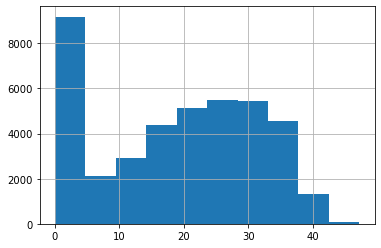

In [112]:
df.minutes.hist()

<AxesSubplot:>

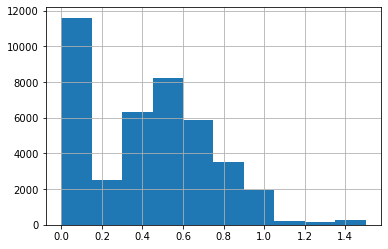

In [111]:
df.efg_rate.hist()

<AxesSubplot:>

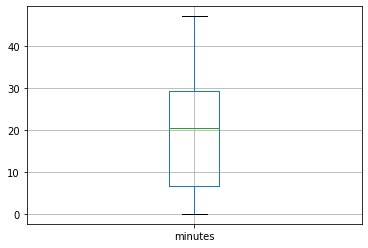

In [119]:
df.boxplot(column = ['minutes'])

<AxesSubplot:>

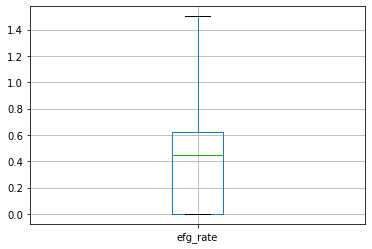

In [118]:
df.boxplot(column = 'efg_rate')

In [130]:
df[['minutes', 'efg_rate', 'fg_rate', 'ft_rate', 'orb_rate', 'off_rtg', 'fg3_rate']].corr()

,minutes,efg_rate,fg_rate,ft_rate,orb_rate,off_rtg,fg3_rate
minutes,1.000000,0.542798,0.542491,0.540300,0.131095,0.584587,0.412762
efg_rate,0.542798,1.000000,0.939460,0.308653,0.171992,0.843823,0.622392
fg_rate,0.542491,0.939460,1.000000,0.325775,0.219986,0.805048,0.500474
ft_rate,0.540300,0.308653,0.325775,1.000000,0.106261,0.429412,0.207878
orb_rate,0.131095,0.171992,0.219986,0.106261,1.000000,0.284385,-0.037413
off_rtg,0.584587,0.843823,0.805048,0.429412,0.284385,1.000000,0.522790
fg3_rate,0.412762,0.622392,0.500474,0.207878,-0.037413,0.522790,1.000000


In [121]:
pd.pivot_table(df, index = 'starter', values = 'minutes')

,minutes
starter,
0,11.688866
1,29.822740


In [131]:
pd.pivot_table(df, index = 'starter', values = ['efg_rate', 'fg_rate', 'ft_rate', 'orb_rate', 'off_rtg', 'fg3_rate'])

,efg_rate,fg3_rate,fg_rate,ft_rate,off_rtg,orb_rate
starter,,,,,,
0,0.334130,0.165946,0.287869,0.228081,73.163839,0.033553
1,0.531122,0.297399,0.463455,0.553918,111.507726,0.045407


In [ ]:
df.to_csv("/Users/ryankeen/Personal_Projects/NBA_Betting/data/cleaned/cleaned_data.csv")